In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(12)
no_obs = 5000

In [3]:
x1 = np.random.multivariate_normal([0,0], [[1, .75],[.75, 1]], no_obs)
x2 = np.random.multivariate_normal([1,4], [[1, .75],[.75, 1]], no_obs)

new_features = np.vstack((x1,x2)).astype(np.float32)
new_features.shape

(10000, 2)

In [4]:
new_labels = np.hstack((np.zeros(no_obs),
                      np.ones(no_obs)))

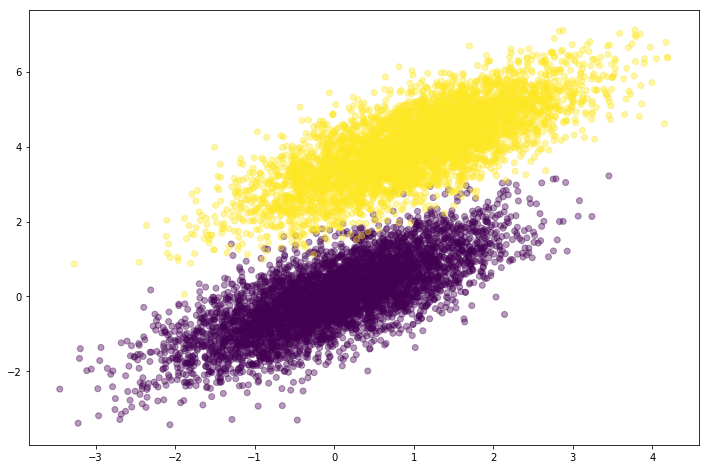

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(new_features[:,0],
           new_features[:,1],
           c = new_labels,
           alpha=0.4)

In [6]:
# Link function
def sigmoid(scores):
    return 1/(1+ np.exp(-scores))

In [7]:
# log-likelihood 

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum(target*scores - np.log(1 + np.exp(scores)))
    return ll

In [8]:
def logistic(features, target, no_steps, lr, add_int = False):
    if add_int:
        intercept = np.ones((features.shape[0],1))
        features = np.hstack((intercept, features))
    weights = np.zeros(features.shape[1])
    
    for step in range(no_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        
        out_error = target - predictions
        
        gradient = np.dot(features.T, out_error)
        weights = weights + lr * gradient
        
        if (step % 10000 == 0):
            print(log_likelihood(features, target, weights))
            
    return weights
          

In [9]:
weights = logistic(new_features, new_labels,
                  no_steps=50000, lr = 5e-5, add_int=True)

-4346.264779152365
-148.70672276805357
-142.9649362310784
-141.54530307157367
-141.06031965930802


In [11]:
print(weights)

[-13.58690551  -4.8809644    7.99812915]


In [14]:
# Accuracy measure
final_score = np.dot(np.hstack((np.ones((new_features.shape[0],1)),
                               new_features)), weights)
preds = np.round(sigmoid(final_score))

In [17]:
print((preds == new_labels).sum().astype(float)/len(preds))

0.9948


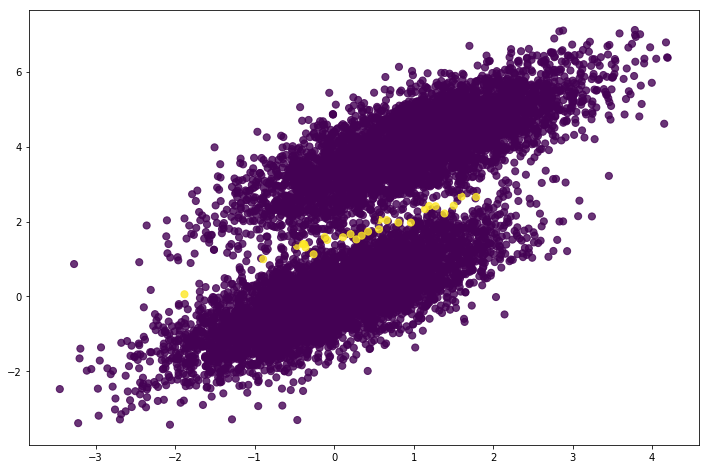

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(new_features[:,0],
           new_features[:,1],
           c = preds == new_labels - 1,
           alpha = 0.8,
           s = 50)